[ 4.66048233e-03 -1.62482417e-01  6.10841955e+01]


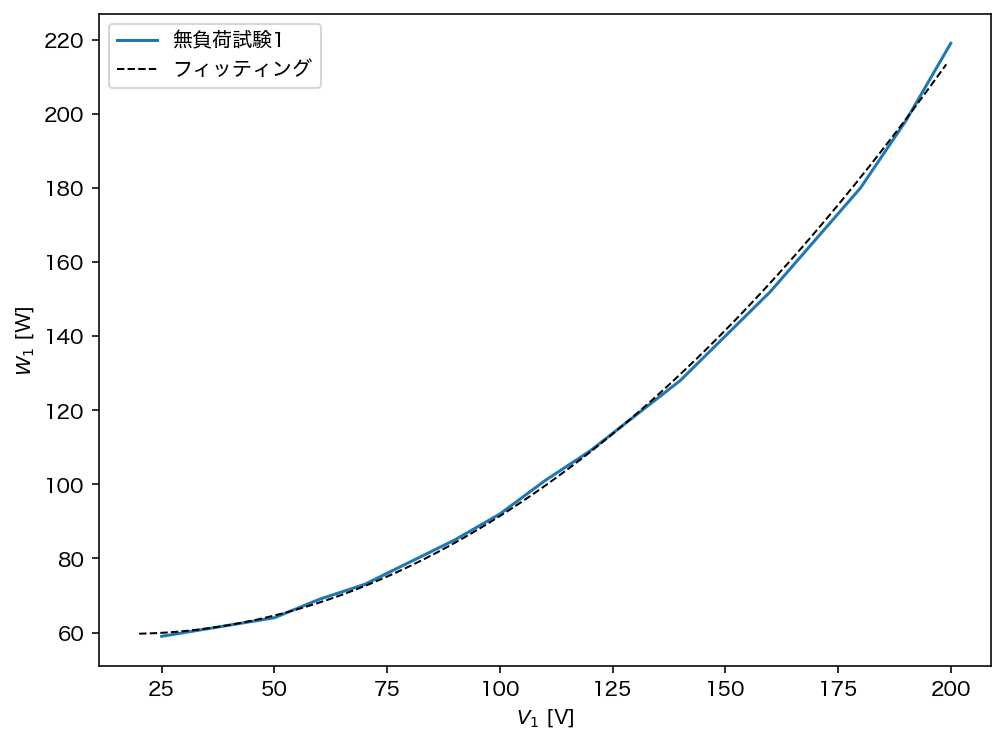

In [131]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from matplotlib import rc
plt.rcParams["font.family"] = "Hiragino Sans"
from matplotlib import rc
import cmath

def drawline(plotname,direction,value,linestyle_="-",printbool = False):
    if(direction=="x"):
        plotname.axvline(value,ymin=0,ymax=1,c='black',linewidth=0.5,linestyle=linestyle_)
        if(printbool): print("Vertical Line at: x=" + str(value))
    else:
        plotname.axhline(value,xmin=0,xmax=1,c='black',linewidth=0.5,linestyle=linestyle_)
        if(printbool): print("Horizontal Line at: y=" + str(value))

fig = plt.figure(figsize=(8, 6), dpi=144)

fig.patch.set_alpha(1)

#V1(V)	I1(A)	W1(W)	N(rpm)
mufuka1 = pd.read_excel(r"DataTotal.xlsx",sheet_name='無負荷試験1')
plt.plot(mufuka1["V1"],mufuka1["W1"],label="無負荷試験1")

fitting = np.polyfit(mufuka1["V1"],mufuka1["W1"],2) 
G0 = fitting[0]
x = np.arange(20,200,1)
y = [fitting[0]*i*i+fitting[1]*i+fitting[2] for i in x]
plt.xlabel(r'$V_1$ [V]')
plt.ylabel(r'$W_1$ [W]')
print(fitting)
plt.plot(x,y,linestyle = "dashed", c="black",linewidth = 1,label="フィッティング")
plt.legend()
plt.savefig("figures/無負荷試験1.png")

[ 5.58684581e-03 -4.00701556e-01  1.59684970e+02]


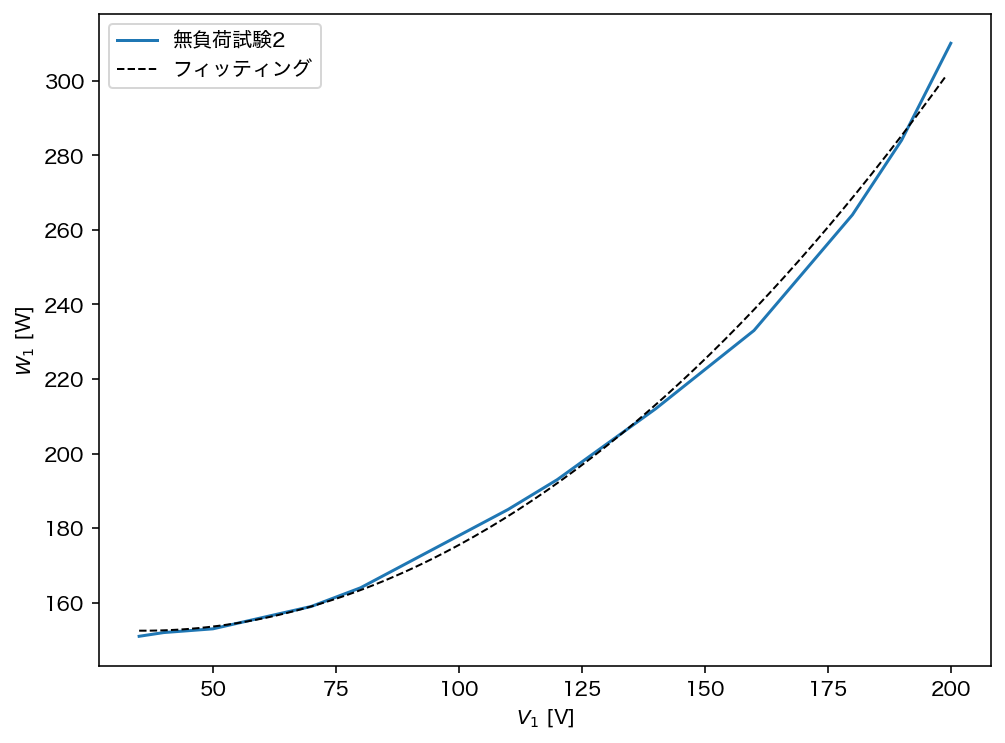

In [126]:
mufuka2 = pd.read_excel(r"DataTotal.xlsx",sheet_name='無負荷試験2')


fig = plt.figure(figsize=(8, 6), dpi=144)
fig.patch.set_alpha(1)

plt.plot(mufuka2["V1"],mufuka2["W1"],label="無負荷試験2")

fitting = np.polyfit(mufuka2["V1"],mufuka2["W1"],2) 
x = np.arange(35,200,1)
y = [fitting[0]*i*i+fitting[1]*i+fitting[2] for i in x]
plt.xlabel(r"$V_1$ [V]")
plt.ylabel(r"$W_1$ [W]")
print(fitting)
plt.plot(x,y,linestyle = "dashed", c="black",linewidth = 1,label="フィッティング")
plt.legend()
plt.savefig("figures/無負荷試験2.png")

In [127]:
I0 = 5.9
V1 = 200
B0 = np.sqrt(3*(I0/V1)**2-G0**2)

print(B0)

#r1 = 0.685　 #補正前
#r2 = 0.685

r1 = 0.817
r2 = 0.817
r_corrected = 0.817

#x1x2 = 2.125
x1x2 = np.sqrt(((41.6/9.5)**2)/3-(r1+r2)**2)
print(x1x2)
alpha = 0.5
x1 = x1x2*alpha
x2 = x1x2*(1-alpha)

0.05088251079159698
1.929189126325848


In [128]:
fuka = pd.read_excel(r"DataTotal.xlsx",sheet_name='負荷試験')

# 速度特性

In [130]:
fig = plt.figure(figsize=(8, 4), dpi=144)
fig.patch.set_alpha(1)

suberi = [i/100 for i in range (0, 101)]
T = []
f = 50
p = 2

V1 = 200/np.sqrt(3)

T = [1/(2*np.pi*f/p)*(3*(V1**2)/((r1+(r2/suberi[i]))**2+x1x2**2))*(r2/suberi[i]) for i in range (1, len(suberi))]

Y = G0 + 1j*B0
Z1 = r1 + 1j*x1

print(Y)
Z2 = 1/Y

T_t = [1/(2*np.pi*f/p)*(3*(cmath.polar(((Z2*(r2/suberi[i] + 1j*x2))/((r2/suberi[i] + 1j*x2)+Z2))/(Z1+(Z2*(r2/suberi[i] + 1j*x2))/((r2/suberi[i] + 1j*x2)+Z2)))[0]*V1)**2/(((r2)/suberi[i])**2+x2**2))*(r2/suberi[i]) for i in range (1, len(suberi))]

T = [0] + T
T_t = [0] + T_t

I2 = [V1 / np.sqrt((r1+(r2/suberi[i]))**2+x1x2**2) for i in range (1, len(suberi))]
I2 = [0] + I2

plt.xlim(1.0,0.0)
plt.ylabel(r"$I_2$ [A]")
plt.xlabel("Slip")
plt.plot(suberi,I2,label=r"$I_2$",c="black",linewidth=1)
#plt.ylim(0,50)
plt.savefig("figures/1/I2.png")

NameError: name 'sqrt' is not defined

<Figure size 1152x576 with 0 Axes>

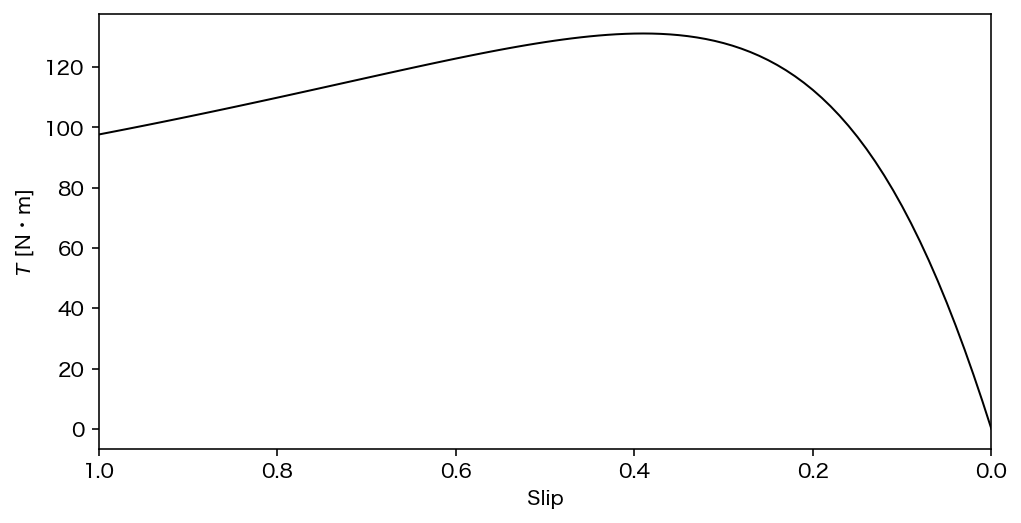

In [112]:
fig = plt.figure(figsize=(8, 4), dpi=144)
fig.patch.set_alpha(1)

plt.xlabel("Slip")
plt.ylabel(r"$T$ [N・m]")
plt.xlim(1.0,0)
#plt.ylim(0,50)
plt.plot(suberi,T,label="Theoretical",c="black",linewidth=1)

plt.savefig("figures/1/torque.png")

0.0


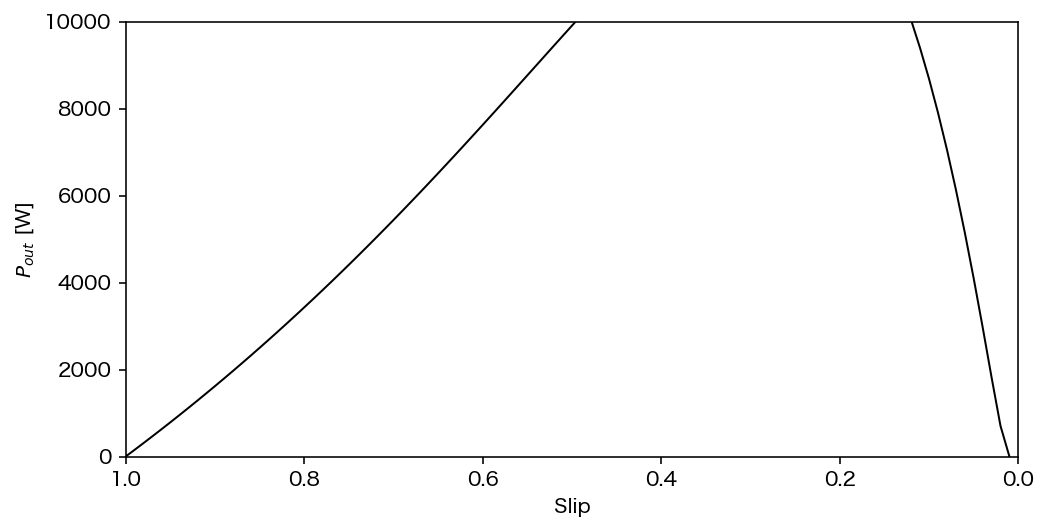

In [113]:
fig = plt.figure(figsize=(8, 4), dpi=144)
fig.patch.set_alpha(1)

print(suberi[0])
suberi = suberi[1:]
Pout = [3*I2[i]**2 * (r2/suberi[i]) * (1-suberi[i]) for i, subr in enumerate(suberi)]
plt.xlim(1.0,0.0)
plt.xlabel("Slip")
plt.ylim(0.0,10000)
plt.ylabel(r"$P_{out}$ [W]")
plt.plot(suberi,Pout,c="black",linewidth=1)
suberi = [0] + suberi

plt.savefig("figures/1/Pout.png")

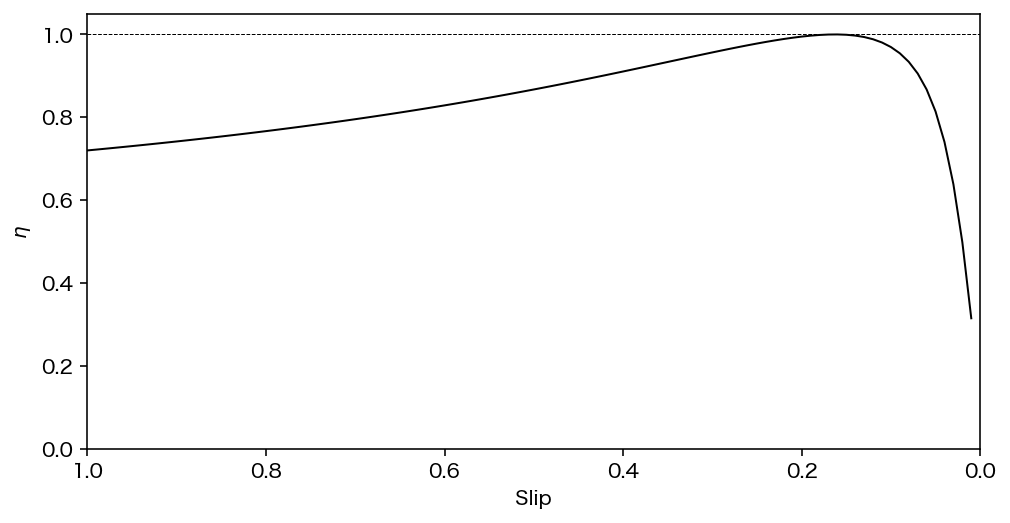

In [114]:
import cmath

fig = plt.figure(figsize=(8, 4), dpi=144)
fig.patch.set_alpha(1)

Y0 = G0 + 1j*B0
suberi = suberi[1:]

Z1 = [(r1 +r2/suberi[i]) + 1j * (x1x2) for i in range (0, len(suberi))]
I1c = [V1 * (Y0 + 1/Z1[i]) for i in range (0, len(suberi))]



S = [3*V1**2*((Y0 + 1/Z1[i]).conjugate()) for i in range (0, len(suberi))]

P1 = [i.real for i in S]

koritsu = [i.real/cmath.polar(i)[0] for i in S]

plt.ylim(0.0,1.05)
plt.xlim(1.0,0.0)
plt.xlabel("Slip")
plt.ylabel("koritsu")
plt.ylabel(r"$\eta$")
drawline(plt,"y",1.0,linestyle_="dashed")
plt.plot(suberi,koritsu,c="black",linewidth=1)

plt.savefig("figures/1/koritsu.png")


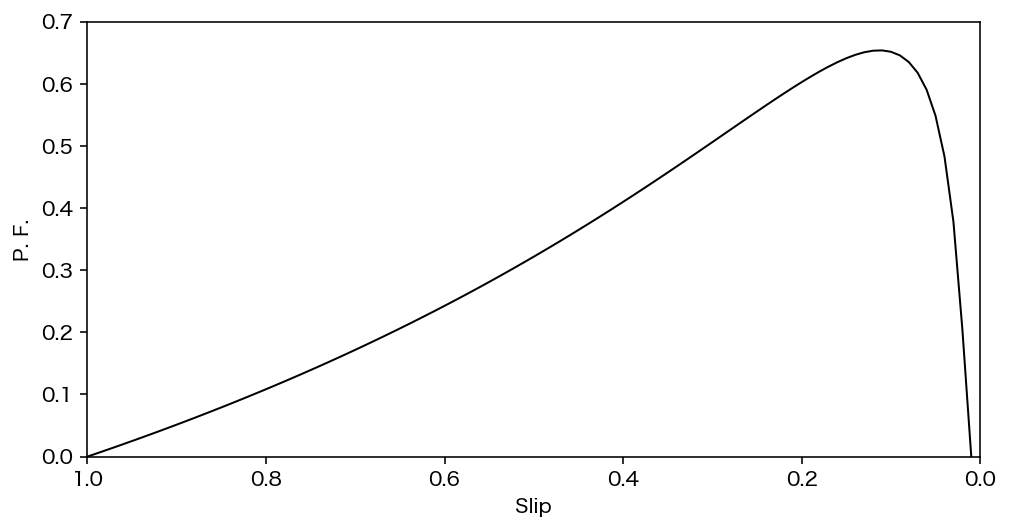

In [115]:
fig = plt.figure(figsize=(8,4), dpi=144)
fig.patch.set_alpha(1)

rikiritsu = [Pout[i]/P1[i] for i in range (0, len(Pout))]
plt.xlim(1.0,0.0)
plt.ylim(0.0,0.7)
plt.xlabel("Slip")
plt.ylabel("P. F.")
plt.plot(suberi,rikiritsu,c="black",linewidth=1)

plt.savefig("figures/1/rikiritsu.png")


# 負荷試験

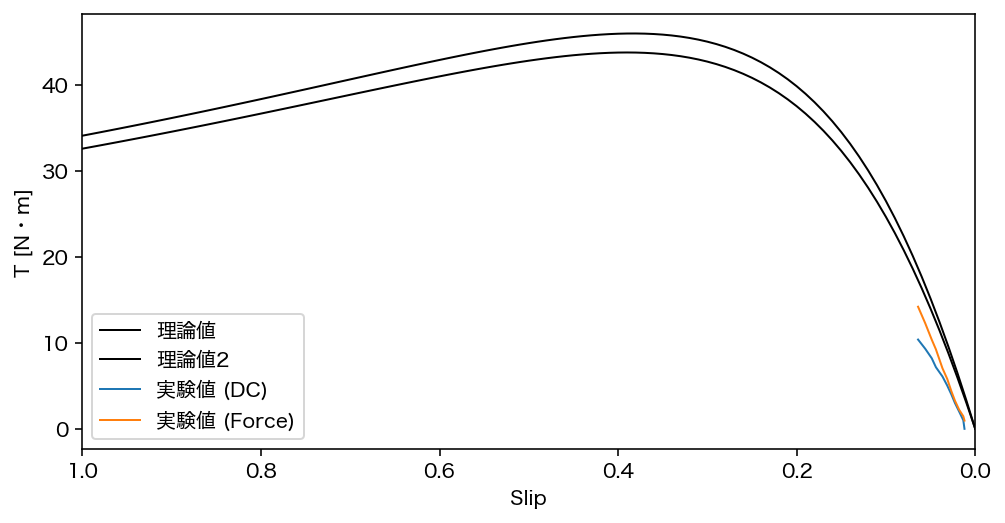

In [116]:
suberi = [0] + suberi

fig = plt.figure(figsize=(8, 4), dpi=144)
fig.patch.set_alpha(1)

ns = 1500

plt.xlabel("s")
plt.ylabel("T")
plt.xlim(1.0,0)

Tnew = [i/3 for i in T]
T_tnew = [i/3 for i in T_t]

plt.plot(suberi,Tnew,label="理論値",c="black",linewidth=1)
plt.plot(suberi,T_tnew,label="理論値2",c="black",linewidth=1)

T2 = [30*fuka["V2"][i]*fuka["I2"][i]/(np.pi*fuka["n"][i]) for i in range (0, len(fuka))]
T2_2 = [fuka["(kg)"][i]*9.80665 *0.287 for i in range (0, len(fuka))]
ns = 1500
suberi = [(ns-i) / ns for i in fuka["n"]]

plt.xlabel("Slip")
plt.ylabel("T [N・m]")
plt.plot(suberi,T2,label="実験値 (DC)",linewidth=1)
plt.plot(suberi,T2_2, label="実験値 (Force)",linewidth=1)
plt.legend()
plt.xlim(1.0,0.0)

plt.savefig("figures/2/results_t.png")

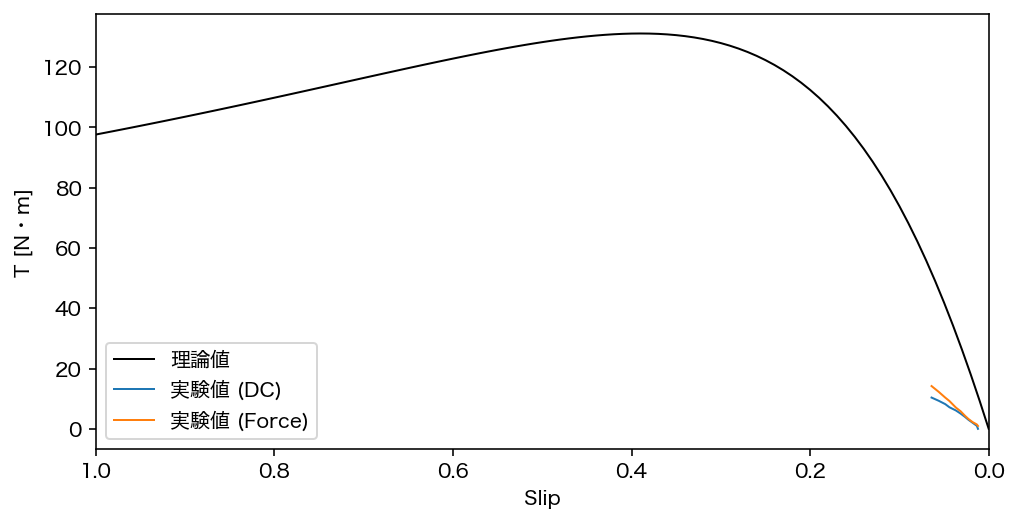

In [ ]:

suberi = [i/100 for i in range (0, 101)]

fig = plt.figure(figsize=(8, 4), dpi=144)
fig.patch.set_alpha(1)

T2 = [30*fuka["V2"][i]*fuka["I2"][i]/(np.pi*fuka["n"][i]) for i in range (0, len(fuka))]
ns = 1500

plt.xlabel("s")
plt.ylabel("T")
plt.xlim(1.0,0)

plt.plot(suberi,T,label="理論値",c="black",linewidth=1)

T2 = [30*fuka["V2"][i]*fuka["I2"][i]/(np.pi*fuka["n"][i]) for i in range (0, len(fuka))]
T2_2 = [fuka["(kg)"][i]*9.80665 *0.287 for i in range (0, len(fuka))]
ns = 1500
suberi2 = [(ns-i) / ns for i in fuka["n"]]

plt.xlabel("Slip")
plt.ylabel("T [N・m]")
plt.plot(suberi2,T2,label="実験値 (DC)",linewidth=1)
plt.plot(suberi2,T2_2, label="実験値 (Force)",linewidth=1)
plt.legend()
plt.xlim(1.0,0.0)

plt.savefig("figures/2/results.png")

In [ ]:
x = np.arange(0.001,1.0,0.001)
i1 = [200/np.sqrt((0.187+0.187/i)**2+(2.125)**2) for i in x]
G0 = 4.66*10**(-3)
B0 = 0.0508
I0 = cmath.polar(G0*200+1j*B0*200)[0]
print(I0)
print(G0*200+1j*B0*200)
ratio = [I0/i for i in i1]

10.202657692973924
(0.932+10.16j)


[195.22324106  -1.52226617]
[258.43593538  -2.30290664]
[817.71092247   0.98940279]


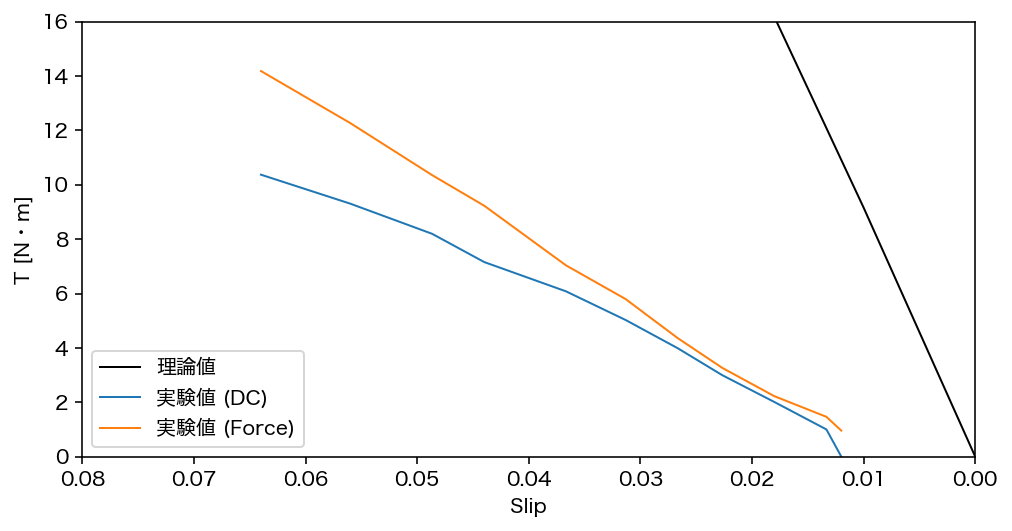

In [ ]:

suberi = [i/100 for i in range (0, 101)]

fig = plt.figure(figsize=(8, 4), dpi=144)
fig.patch.set_alpha(1)

T2 = [30*fuka["V2"][i]*fuka["I2"][i]/(np.pi*fuka["n"][i]) for i in range (0, len(fuka))]
ns = 1500

plt.xlabel("s")
plt.ylabel("T")
plt.xlim(1.0,0)

plt.plot(suberi,T,label="理論値",c="black",linewidth=1)

T2 = [30*fuka["V2"][i]*fuka["I2"][i]/(np.pi*fuka["n"][i]) for i in range (0, len(fuka))]
T2_2 = [fuka["(kg)"][i]*9.80665 *0.287 for i in range (0, len(fuka))]
ns = 1500
suberi2 = [(ns-i) / ns for i in fuka["n"]]

plt.xlabel("Slip")
plt.ylabel("T [N・m]")
plt.plot(suberi2,T2,label="実験値 (DC)",linewidth=1)
plt.plot(suberi2,T2_2, label="実験値 (Force)",linewidth=1)

print(np.polyfit(suberi2,T2,1))
print(np.polyfit(suberi2,T2_2,1))

suberi_small = []
theory_small = []
for i in range (0, len(suberi)):
    if(suberi[i] < 0.07):
        suberi_small.append(suberi[i])
        theory_small.append(T[i])

print(np.polyfit(suberi_small,theory_small,1))

plt.legend()
plt.xlim(0.08,0.0)
plt.ylim(0.0,16)
plt.savefig("figures/2/experiments.png")

[195.22324106  -1.52226617]
[258.43593538  -2.30290664]
[817.71092247   0.98940279]


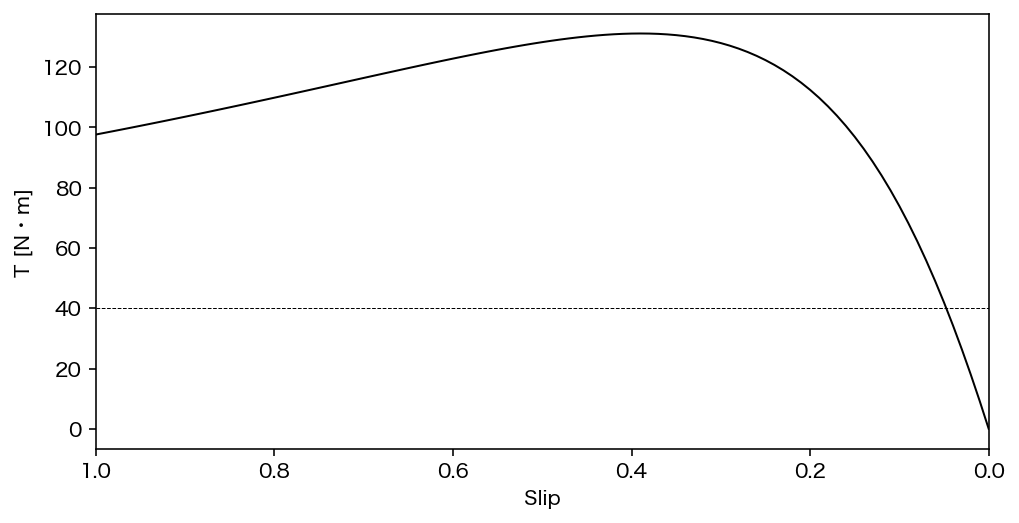

In [ ]:

suberi = [i/100 for i in range (0, 101)]

fig = plt.figure(figsize=(8, 4), dpi=144)
fig.patch.set_alpha(1)

T2 = [30*fuka["V2"][i]*fuka["I2"][i]/(np.pi*fuka["n"][i]) for i in range (0, len(fuka))]
ns = 1500

plt.xlabel("s")
plt.ylabel("T")
plt.xlim(1.0,0)

plt.plot(suberi,T,label="理論値",c="black",linewidth=1)

T2 = [30*fuka["V2"][i]*fuka["I2"][i]/(np.pi*fuka["n"][i]) for i in range (0, len(fuka))]
T2_2 = [fuka["(kg)"][i]*9.80665 *0.287 for i in range (0, len(fuka))]
ns = 1500
suberi2 = [(ns-i) / ns for i in fuka["n"]]

plt.xlabel("Slip")
plt.ylabel("T [N・m]")
#plt.plot(suberi2,T2,label="実験値 (DC)",linewidth=1)
#plt.plot(suberi2,T2_2, label="実験値 (Force)",linewidth=1)

print(np.polyfit(suberi2,T2,1))
print(np.polyfit(suberi2,T2_2,1))

suberi_small = []
theory_small = []
for i in range (0, len(suberi)):
    if(suberi[i] < 0.07):
        suberi_small.append(suberi[i])
        theory_small.append(T[i])

print(np.polyfit(suberi_small,theory_small,1))

plt.axhline(40,xmin=0,xmax=1,c='black',linewidth=0.5,linestyle="dashed")

plt.xlim(1.0,0.0)
plt.savefig("figures/2/experiments_.png")